Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "David Ma"
COLLABORATORS = ""

---

In [2]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd
from __future__ import print_function
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec
from ipywidgets import interactive 

# Final Project

This notebook will provide a brief structure and rubric for presenting your final project.

The purpose of the project is 2-fold
* To give you an opportunity to work on a problem you are truly interested in (as this is the best way to actually learn something)
* To demonstrate to me that you understand the overall workflow of problem solving from problem selection to implementation to discussion

You can choose any subject area that interests you as long as there is a computational component to it.  However, please do not reuse projects or homeworks you have done in other classes.  This should be **your** original work.

### Structure
There are 5 parts for a total of 100 points that provide the overall structure of a mini research project.

* Problem Description
* Problem Justification
* Description of Computational components needed to address problem
* Implementation including tests
* Discussion of results and future directions

For grading purposes, please try to make this notebook entirely self contained.

The project is worth about 2 problem sets and should be of comparable length or less (please: I will have 120 of these to read and I am not expecting full papers).  The actual project does not necessarily have to work but in that case you should demonstrate that you understand why it did not work and what steps you would take next to fix it.

Have fun

## Problem Description [20 pts]

Briefly describe the general problem you want to solve and the goals you hope to achieve

The general problem I want to solve is to create an epidemiological model of COVID-19 and check if the generated model is reliable by comparing it to the real-life figure. With different kinds of epidemiological models out there, a realistic one is very hard to acheive. Many factors and sub-populations (ex. susceptible, infected) need to be taken into consideration to help simulate an accurate one. Moreover, the type (discrete or dynamic) of system needs to be carefully selected and analyzed to help give us an understanding of which kind of system provides a more precise illustration of this disease. 

A dynamical system is a set of differential equations that describe the time dependence of a point in a geometric space. In an epidemiological model, the simplest dyanmical system is a SIR model which describes the change in the suceptible, infected and recovered population overtime. This system describes a sequential event of the individuals progressing between compartments where an individual in the susceptible population may become infected and then recover from the virus once a certain period of time passes. This system is expressed as:\
\
<span style='color:Blue'>**Dynamical SIR Model** </span>
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N} \\
\frac{dI}{dt}&= \frac{\alpha SI}{N} -\beta I\\
\frac{dR}{dt}&= \beta I
\end{aligned}
$$
where $\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day, and $N$ is the total population. By giving this system more variables and sub-populations, a more realistic system can be modelled. By adding an exposed population where the susceptible individuals interact with the infected population and get exposed to the virus, a deceased population where the infected populations sadly die from the virus, a vaccinated population to prevent being infected by a virus and by introducing a birth rate, the SIR model can be further developed into a SEIRDV model shown below:\
\
<span style='color:Blue'>**Dynamical SEIRDV Model**</span>
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N}-p(N-V)b + V\delta \\
\frac{dE}{dt}&= \frac{\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I\\\
\frac{dR}{dt}&= (1-\eta)\beta I\\
\frac{dD}{dt}&= \eta \mu I\\
\frac{dV}{dt}&= p(N-V)b - V\delta\\\
\end{aligned}
$$
where in addition to the variables defined above, $b$ is the birth rate per day, $\eta$ is the fatality rate, $\zeta$ is the incubation period once exposed, $\mu$ is the death rate, $p$ is the vaccination rate at birth, $\delta$ is the non-birth vaccination rate, and $N$ is the total population. 

A discrete system is a set of difference equations that describe a change in outputs over an evolution of time. The outputs (Variables with n+1 subscripts) of these equations depend on the input of the previous outputs (variables with n subscripts) which create a continuous model. Similarly to a dynamical system, the simplest discrete epidemiological model is a SIR model. This system is expressed as:\
\
<span style='color:Green'>**Discrete SIR Model**</span>
\
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N} \\
I_{n+1} &= I_n+\frac{\alpha I_n S_n}{N}-\beta I_n\\
R_{n+1} &= R_n+\beta I_n
\end{aligned}
$$
where the variables are the same as the dynamical SIR system. With the addition of other sub-populations, this SIR system can be transformed into a SEIRDV system to mimic a more practical simulation. The revised system is:\
\
<span style='color:Green'>**Discrete SEIRDV Model**</span>
\
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N}-p(N-V_n)b + V_n\delta \\
E_{n+1} &= E_n+\frac{\alpha I_n S_n}{N}-E_n\zeta\\
I_{n+1} &= I_n+E_n\zeta-(1-\eta)\beta I_n-\eta \mu I_n\\
R_{n+1} &= R_n+(1-\eta)\beta I_n\\
D_{n+1} &= D_n+\eta \mu I_n\\
V_{n+1} &= V_n+p(N-V_n)b - V_n\delta\\
\end{aligned}
$$
where the variables are the same as the dynamical SEIRDV system.

Another epidemiological model that is widely used is the SIS model. This model describes the sequential event of an individual who is in the susceptible population may become infected and become vulnerable to the virus again once he recovers. This model may also demonstrate the COVID situation going on right now as reinfection does exist according to CDC. The dynamic system of a SIS model can be expressed as:\
\
<span style='color:Blue'>**Dynamic SIS Model**</span>
\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N}+\beta I\\
\frac{dI}{dt}&= \frac{\alpha SI}{N} -\beta I\\
\end{aligned}
$$
where the used variables are the same as the systems above. By giving this system more variables and sub-populations, a more realistic system can be modelled. As this scenario describes no cure, a recovered popuation and a vaccinated population will not be introduced. Therefore an adding of the exposed population and a deceased population will be introduced with also birth rates affecting the system. The further developed SIS model, SEISD model, is shown below:\
\
<span style='color:Blue'>**Dynamic SEISD Model**</span>
\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N} +(1-\eta)\beta I - bI\\
\frac{dE}{dt}&= \frac{\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I + bI\\
\frac{dD}{dt}&= \eta \mu I\\
\end{aligned}
$$
where the used variables are the same as the systems above.

A discrete system of the SIS model was also introduced:\
\
<span style='color:Green'>**Discrete SIS Model**</span>
\
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N}+I_n\beta \\
I_{n+1} &= I_n-I_n\beta + \frac{\alpha I_n S_n}{N}\\
\end{aligned}
$$
where the used variables are the same as the systems above. A developed SIS model, SEISD model, can be thus depicted as:\
\
<span style='color:Green'>**Discrete SIS Model**</span>
\
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N} +(1-\eta)\beta I_n - bI_n\\
E_{n+1} &= E_n+\frac{\alpha I_n S_n}{N}-E_n\zeta\\
I_{n+1} &= I_n+E_n\zeta-(1-\eta)\beta I_n-\eta \mu I_n + bI_n\\\
D_{n+1} &= D_n+\eta \mu I_n\\
\end{aligned}
$$
where the used variables are the same as the systems above. 

A basic reproduction number $R_0$ is a variable used to understand how the rate of transmission of the virus affects the infectious rate and how the sub-populations change overtime according to its value. $R_0$ can have a huge effect when simulating a epidemiological model. $R_0$ is defined as the average number of people who will contract the disease from one person with that disease. Different values of $R_0$ exist and hold different definitions:
* $R_0<1$: each existing infection causes less than one new infection. In this case, the disease will decline and eventually die out. 
* $R_0=1$: each existing infection causes one new infection. 
* $R_0<1$: each existing infection causes more than one new infection. In this case, the disease will increase causing an epidemic.

As the transmission of COVID-19 resulted to be a pandemic, $R_0>1$. The magnitude of $R_0$ greatly affects the given population. Especially in large populations, the spread of the virus will be even more rapid if $R_0$ is large. 

Social distancing is also a huge factor that needs to be taken into consideration as it has tremendous effects on minimizing the transmission of COVID-19. By introducing the contact rate reduction factor $k$, both the rate of change in susceptible and exposed population can be redefined. A refined expression using a dynamical system is shown below:\
\
<span style='color:Blue'>**Dynamical Social Distancing SEIRDV Model**</span>
\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{k\alpha I S}{N}-p(N-V)b + V\delta \\
\frac{dE}{dt}&= \frac{k\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I\\
\frac{dR}{dt}&= (1-\eta)\beta I\\
\frac{dD}{dt}&= \eta \mu I\\
\frac{dV}{dt}&= p(N-V)b - V\delta\\
\end{aligned}
$$

As depicted above, many details and factors need to be taken into consideration when generating and evaluating an epidemiological model. In fact, many epidemiological models exist. To reiterate, the big problem of what I hope to solve is constructing a realistic simulation model that can potentially match the scenario of the pandemic. To acheive this big goal, many analyses needs to be made. These small goals include determining if a better simulation model can be constructed with either a discrete system or a dynamic system (from the systems above), understand how sub-populations and disease related-factors can affect the simulation (as shown above), learn how each epidemiological model produces different results, show how the basic reproduction number affects the simulation and demonstrate the positive effects of social distancing. My generated simulations will be compared with other simulation models generated from researchers and real-world data to draw a conclusion on its efficacy. Moreover, if my epidemiological model cannot depict the COVID-19 situation well, the reasoning and potential gaps will be explored.

## Problem Justification [10 pts]

Briefly describe why this problem is important to you,  and, if possible, to anyone else.

Construction of epidemiological models are very important as it can aid us in understanding the impact of a disease overtime. By using an epidemiological model, it will be easier to predict and observe on how the given population is affected by the disease. In other words, it can be the foundation/baseline in understanding how the infection affects humanity. In addition, with the use of different sub-populations, the population dynamics of a given total population can help ilustrate the movement of the disease. The results of these compartmental models in epidemiology can offer not just myself, but everyone else information on how the disease may evolve and transmit overtime. The simulation can trigger emotions such as reassurace or despair from the capability of the disease we are dealing with. Moreover, simulations of newly discovered disease or potential diseases can be illustrated to help understand possible dangers or weaknesses of the disease. An epidemiological model can also help the country make decisions on the actions that need to be taken. If the disease is found out to be severe, the choice to lockdown the country can be made. If the disease is found out to be minor, not severe restrictions can be applied to the country. All in all, these models can be a very powerful tool to not just improve understanding of the disease but also can be used to make future decisions for the users, observers and the country.\
Epidemiological models has been incorporated since the early 20th century and has been used to model many diseases in the past. Furthermore the new emerging virus, COVID-19, has also been modelled since the beginning of the outbreak. However, there is defecit in models that can accurately simulate the impact from COVID-19. Therefore there is a need to develop a simulation model that can demonstrate the danger of COVID-19 accurately and be available for revisions once we learn more about this virus. Thus, this problem is very important to all of us as a well-simulated epidemiological model can help convey the potential danger and devise solutions that can be implemented to prevent the transmission of this virus. Personally from my models, I would like to learn how hazardous this virus is and how much effect safety measures have impact on preventing the spread of the virus. I hope the reader thinks the same :)

## Numerical Methods [10 pts]

Briefly describe the specific approach you will take to solve some concrete aspect of the general problem including the numerical or computational methods you intend to use.  These can include methods we did not discuss in class but provide some reference to the method. You do not need to explain how the methods work, but you should briefly justify your choices.

To demonstrate the practicality of the epidemiological model, I am going to explore both a dynamical and discrete system to decide which system models the pandemic better. The dynamical system will use my own routine (my_ODE_solver) and be validated from using "solve_ivp" in the test cell. The discrete system will use difference equations to model the pandemic. Both systems will be then compared to simulations made from others (figures retreived from published journals) and real-data (worldometers) to be evaluated (All the figures generated and used to model depict the USA situation). For each of my epidemiological model, I will use the most common real values retreived from the internet for the parameters to demonstrate a realistic simulation. For each system, general epidemiological models (SIR and SIS) will be constructed. Moreover, more advanced models (SEIRDV and SEISD) which incorporate additional factors/subpopulations to illustrate a more real-life scenario will also be constructed and compared to justify which model is more practical and real. A focused version of the SIR&SIS models from SEIRDV&SEISD will also be constructed for each system and be compared to the original SIR&SIS models. Additionally, a bifurcation diagram will be constructed for the more realistic system (either dynamic or discrete) using $R_0$ with different values to evaluate its effects on $\alpha$ to examine the practicality of the model. This diagram will evaluate a SIS, SIR, SEIRDV and SEIRD model. Finally, social distancing will be applied on the more realistic simulation to demonstrate its effects on the spread of the virus and further evaluate the practicality and accuracy of the selected model. The reader will be able to widget the effects social distancing has on the simulation. In the discussion section, I will comment on all the results and draw a conclusion of my constructed models to evaluate its potential use and weaknesses it might have in modelling the COVID-19 situation. 

## Implementation [40 pts]

Use the Markdown and Code blocks below to implement and document your methods including figures.  Only the first code block will be a grading cell but feel free to add (not copy) cells in this section to organize your work. 

For at least one routine you code below, you should provide a test block (e.g. that implements `numpy.testing` routines) to validate your code.

## <span style='color:Red'> Real Data </span>

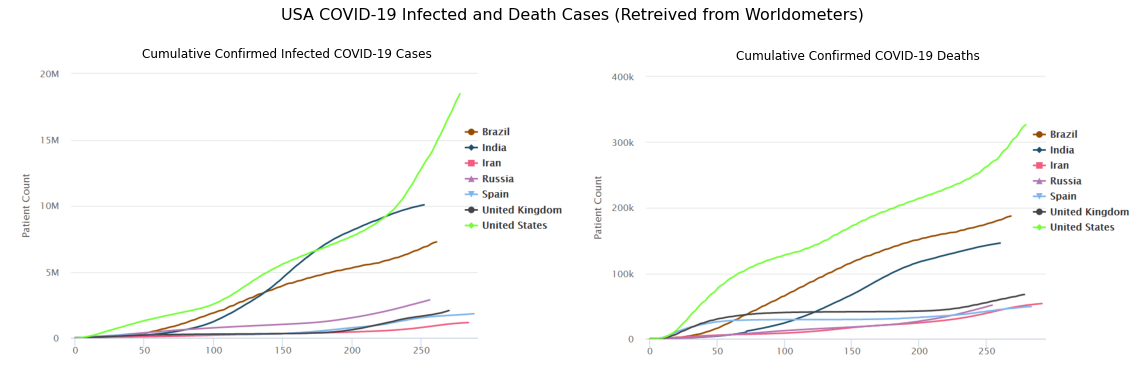

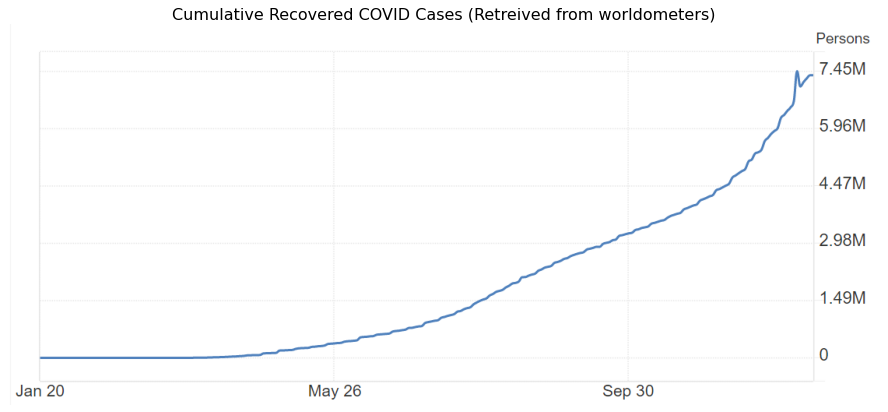

In [3]:
#importing images
img1 = plt.imread('covid_cases.PNG')
img2 = plt.imread('covid_deaths.PNG')
img3 = plt.imread('covid_recovered.PNG')

#plotting images and labelling them
f, ax = plt.subplots(1, 2, figsize=(16,6))
numpy.vectorize(lambda ax:ax.axis('off'))(ax)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[0].set_title('Cumulative Confirmed Infected COVID-19 Cases')
ax[1].set_title('Cumulative Confirmed COVID-19 Deaths')
f.suptitle('USA COVID-19 Infected and Death Cases (Retreived from Worldometers)', fontsize=16)
plt.tight_layout()
plt.show()

#plotting images and labelling them
f, ax = plt.subplots(1, 1, figsize=(18,7))
numpy.vectorize(lambda ax:ax.axis('off'))(ax)
ax.imshow(img3)
ax.set_title('Cumulative Recovered COVID Cases (Retreived from worldometers)',fontsize=16)
plt.show()

## <span style='color:Red'> Sample Simulation Models </span>

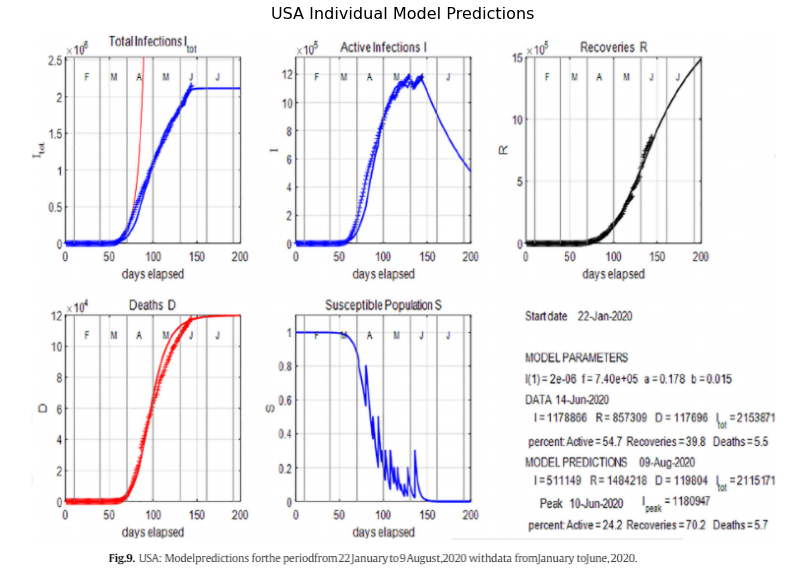

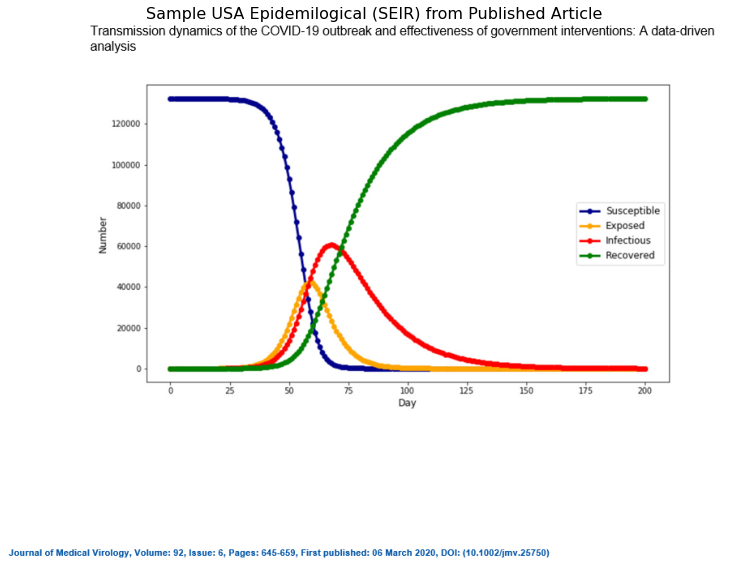

In [4]:
#importing images
img4 = plt.imread('covid_USA.PNG')
img5 = plt.imread('covid_overall.PNG')

#plotting the images and labelling them
plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(img4)
plt.title('USA Individual Model Predictions', fontsize=16)
plt.show()

#plotting the images and labelling them
plt.figure(figsize=(16,10))
plt.axis('off')
plt.imshow(img5)
plt.title('Sample USA Epidemilogical (SEIR) from Published Article', fontsize=16)
plt.show()

#### <span style='color:Black'>For all dynamical systems below, the following ODE solver was used: </span>

In [5]:
def my_ode_solver(f, t_span, u0, N):
    """ implement constant step size ODE integrator using a RK4 method
    
    parameters
    ----------
        f: calleable
            vector valued function with interface f(t,u) where u is the state vector
        t_span: float list or array (or tuple)
            array holding range of times to integrate over t_span = [ t_min, t_max]
        u0:  numpy array
            array of initial conditions
        N: integer
            number of time steps to take 
            
    returns:
    --------
        t: numpy array
            array of timesteps from t_min to t_max of length N
        u: numpy array of shape (len(u0), len(t))
            solution array,  the solution at timestep i should be u[:,i]
    """
    
    #defining variables
    t = numpy.linspace(t_span[0], t_span[1], N)
    delta_t = t[1] - t[0]
    u = numpy.zeros((len(u0),len(t)))   
    u[:,0] = u0
    
    #computing RK4 values
    for (n, t_n) in enumerate(t[1:]):
        K_1 = delta_t * numpy.array(f(t_n, u[:,n]))
        K_2 = delta_t * numpy.array(f(t_n + delta_t/2., u[:,n] + K_1/2.))
        K_3 = delta_t * numpy.array(f(t_n + delta_t/2., u[:,n] + K_2/2.))
        K_4 = delta_t * numpy.array(f(t_n + delta_t, u[:,n] + K_3))
        u[:,n+1] = u[:,n] + 1./6. * (K_1 + 2.*( K_2 + K_3) + K_4)
    
    #returing the numpy array and solution array
    return t, u

## <span style='color:Red'> **Scenario 1: Once Recovered from COVID, individuals will not be reinfected**  </span> 

### <span style='color:Black'>This scenario will be based on the assumption that once the infected individuals recover, they will not be susceptible to the virus anymore. All systems below are a closed system where the sum of all sub-populations equal the total population $N=10000$. All variables retreived are real USA statistics. </span>

### <span style='color:Blue'>SIR Model: General Model </span>

**Dynamical SIR Model**\
In this dynamical system, I have a susceptible population towards the virus, an infected population of the virus and a recovered population from the virus. My defined system is shown below:
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N} \\
\frac{dI}{dt}&= \frac{\alpha SI}{N} -\beta I\\
\frac{dR}{dt}&= \beta I
\end{aligned}
$$
$\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day, and $N$ is the total population. 


In [6]:
def A1(t,u,N,alpha,beta):
    """ RHS of SIR model
    
    parameters:
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of [ s, i, r] values such that sum(u) = N 
        N: float
            total population
        alpha: float
            infection rate per person
        beta: float
            recovery rate per day
            
    returns:
        Fu: numpy array
    """
    
    #defining variables
    sus=u[0]
    infec=u[1]
    rec=u[2]
    Fu=[]
    
    #appending rate of change values of the SIR ode system
    Fu.append((-alpha*infec*sus)/N)
    Fu.append((alpha*infec*sus)/N-beta*infec)
    Fu.append(beta*infec)
    
    #returning output
    return Fu

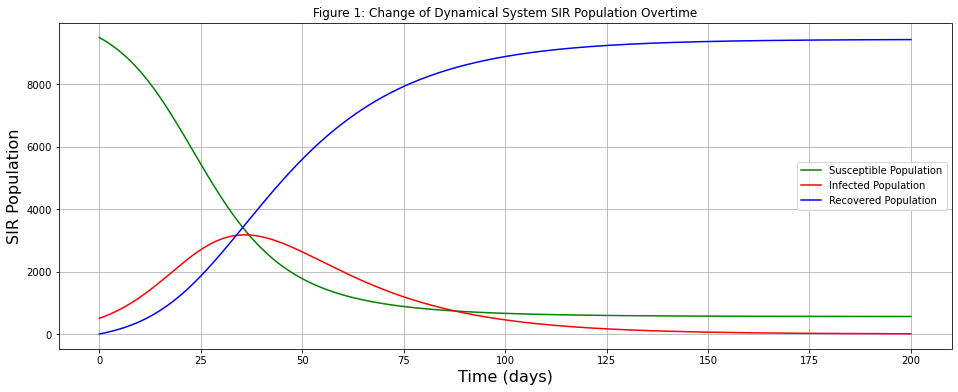

In [7]:
#defining variables
N=10000
alpha = 0.15
beta=0.05
f = lambda t, u: A1(t, u, N, alpha, beta)
t_span = [0., 200.]
u_0 = numpy.array([9500, 500, 0])

#using my routine to solve the ODE system
t, u = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u[0],'g-',label='Susceptible Population')
axes.plot(t, u[1],'r-',label='Infected Population')
axes.plot(t, u[2],'b-',label='Recovered Population')
axes.set_title("Figure 1: Change of Dynamical System SIR Population Overtime")
axes.set_xlabel("Time (days)", fontsize=16)
axes.set_ylabel("SIR Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

In [8]:
#testing cell

N=10000
alpha = 0.15
beta=0.05
f = lambda t, u: A1(t, u, N, alpha, beta)
t_span = [0., 200.]
u_0 = numpy.array([9500, 500, 0])
t, u = my_ode_solver(f, t_span, u_0, N)

# testing my routine to the true solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)
numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-5, atol=1.e-5)
print('success!')

success!


**Discrete system of SIR Model**: \
In this discrete system, I have a susecptible population towards the virus, an infected population from the virus and a recovered population from the virus. My defined system is shown below:
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N} \\
I_{n+1} &= I_n+\frac{\alpha I_n S_n}{N}-\beta I_n\\
R_{n+1} &= R_n+\beta I_n
\end{aligned}
$$
 $\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day, and $N$ is the total population. 

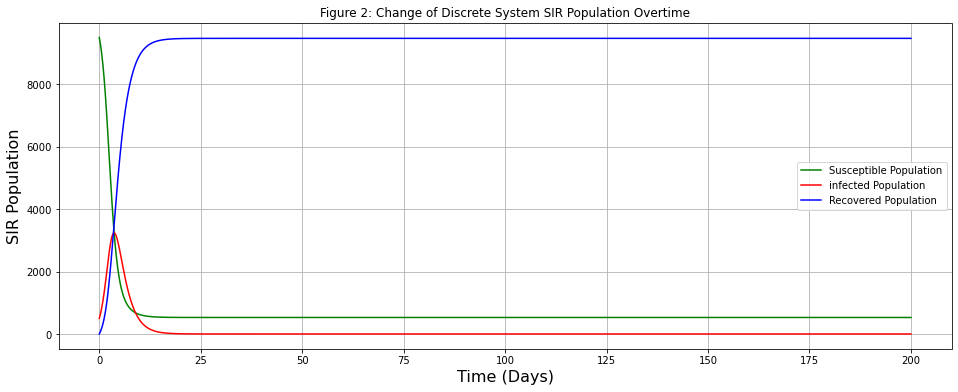

In [9]:
#defining variables
N=10000
beta=0.05
alpha=0.15
t=numpy.linspace(0,200,2000)
s_array=numpy.zeros(len(t))
i_array=numpy.zeros(len(t))
r_array=numpy.zeros(len(t))
s_array[0]=9500
i_array[0]=500
r_array[0]=0


#computing change of populations overtime
for i in range(1,len(t)):
    s_array[i]=s_array[i-1]-(alpha*i_array[i-1]*s_array[i-1])/N
    i_array[i]=i_array[i-1]-beta*i_array[i-1]+(alpha*i_array[i-1]*s_array[i-1])/N
    r_array[i]=r_array[i-1]+beta*i_array[i-1]
    
#plotting the system and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, s_array,'g-',label='Susceptible Population')
axes.plot(t, i_array,'r-',label='infected Population')
axes.plot(t, r_array,'b-',label='Recovered Population')
axes.set_title("Figure 2: Change of Discrete System SIR Population Overtime")
axes.set_xlabel("Time (Days)", fontsize=16)
axes.set_ylabel("SIR Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

### <span style='color:Blue'>SEIRDV Model: Advanced model with more components to mimic real world scenario (this demonstrates the current situation as a vaccine was created) </span>

**Dynamical SEIRDV Model**  \
In this dynamical system, I have a susceptible population towards the virus, an exposed population to the virus, an infected population from the virus, a recovered population from the virus and deceased population due to the virus, and vaccinated population that can defend you from the virus. My defined system is shown below:
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N}-p(N-V)b + V\delta \\
\frac{dE}{dt}&= \frac{\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I\\\
\frac{dR}{dt}&= (1-\eta)\beta I\\
\frac{dD}{dt}&= \eta \mu I\\
\frac{dV}{dt}&= p(N-V)b - V\delta\\\
\end{aligned}
$$
$\alpha$ is the infection rate per individual, $\beta$ is the recovery rate per day, $b$ is the birth rate per day, $\eta$ is the fatality rate, $\zeta$ is the incubation period once exposed, $\mu$ is the death rate, $p$ is the vaccination rate at birth, $\delta$ is the non-birth vaccination rate, and $N$ is the total population. As the vaccination rate at birth and non-birth vaccination rate does not exist yet, arbitrary values were given.

In [10]:
def A2(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta):
    """ RHS of SEIRDV model 
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of [ S, E, I, R, D, V] values such that sum(u) = N
        N: float
            total population
        alpha: float
            infection rate per person
        beta: float
            recovery rate per day
        eta: float
            fatility rate
        zeta: float
            incubation period once exposed 
        b: float
            birth rate
        mu: float
            death rate
        p: float
            vaccination rate at birth
        delta: float
            non-birth vaccination rate
                   
    returns:
        Fu: numpy array
    """
    
    #defining variables
    sus=u[0]
    exp=u[1]
    infec=u[2]
    rec=u[3]
    death=u[4]
    vac=u[5]
    Fu=[]
    
    #appending rate of change values of the SIR ode system
    Fu.append((-alpha*infec*sus)/N-p*(N-vac)*b+vac*delta)
    Fu.append((alpha*infec*sus)/N-zeta*exp)
    Fu.append(zeta*exp-(1-eta)*beta*infec-eta*mu*infec)
    Fu.append((1-eta)*beta*infec)
    Fu.append(eta*mu*infec) 
    Fu.append(p*(N-vac)*b-vac*delta)
    
    #returning output
    return Fu

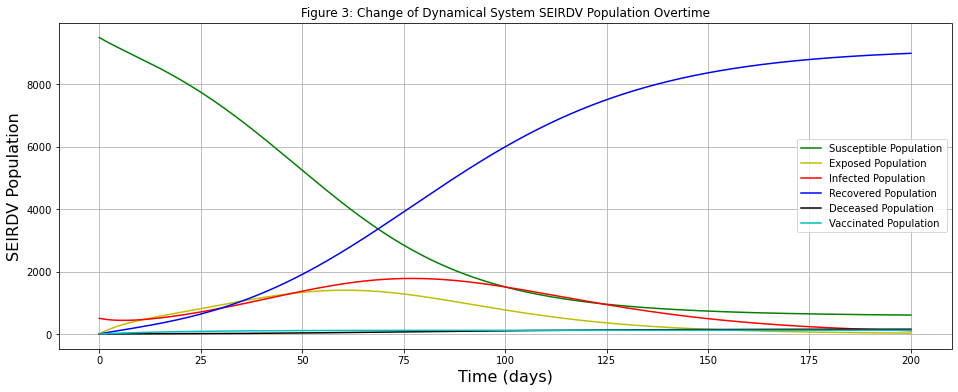

In [11]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
p=0.05
delta=0.05
f = lambda t, u: A2(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta)
t_span = [0., 200.]
u_0 = numpy.array([9500, 0, 500,0,0,0])

#using my routine to solve the ODE system
t, u = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u[0],'g-',label='Susceptible Population')
axes.plot(t, u[1],'y-',label='Exposed Population')
axes.plot(t, u[2],'r-',label='Infected Population')
axes.plot(t, u[3],'b-',label='Recovered Population')
axes.plot(t, u[4],'k-',label='Deceased Population')
axes.plot(t, u[5],'c-',label='Vaccinated Population')
axes.set_title("Figure 3: Change of Dynamical System SEIRDV Population Overtime")
axes.set_xlabel("Time (days)", fontsize=16)
axes.set_ylabel("SEIRDV Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

In [12]:
#testing cell

#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
p=0.05
delta=0.05
f = lambda t, u: A2(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta)
t_span = [0., 200.]
u_0 = numpy.array([9500, 0, 500,0,0,0])
t, u = my_ode_solver(f, t_span, u_0, N)

# testing my routine to the true solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)
numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-5, atol=1.e-5)
print('success!')

success!


**SIR Model in Dynamical SEIRDV Model**\
SIR in SEIRDV was analyzed to show if there is better correlation with the real data.

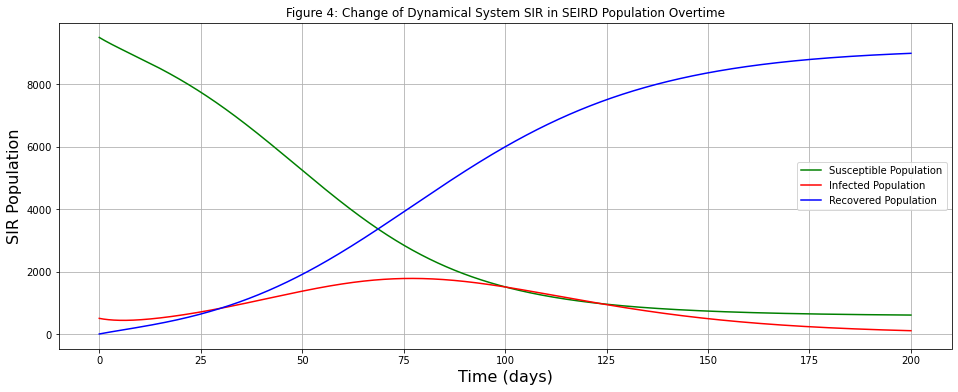

In [13]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
p=0.05
delta=0.05

f = lambda t, u: A2(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta)
t_span = [0., 200.]
u_0 = numpy.array([9500, 0, 500,0,0,0])

#using my routine to solve the ODE system
t, u = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u[0],'g-',label='Susceptible Population')
axes.plot(t, u[2],'r-',label='Infected Population')
axes.plot(t, u[3],'b-',label='Recovered Population')
axes.set_title("Figure 4: Change of Dynamical System SIR in SEIRD Population Overtime")
axes.set_xlabel("Time (days)", fontsize=16)
axes.set_ylabel("SIR Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

**Discrete SEIRDV Model**: \
In this discrete system, I have a susceptible population towards the virus, an exposed population to the virus, an infected population from the virus, a recovered population from the virus, a deceased population from the virus and a vaccinated population for the virus. My defined system is shown below:
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N}-p(N-V_n)b + V_n\delta \\
E_{n+1} &= E_n+\frac{\alpha I_n S_n}{N}-E_n\zeta\\
I_{n+1} &= I_n+E_n\zeta-(1-\eta)\beta I_n-\eta \mu I_n\\
R_{n+1} &= R_n+(1-\eta)\beta I_n\\
D_{n+1} &= D_n+\eta \mu I_n\\
V_{n+1} &= V_n+p(N-V_n)b - V_n\delta\\
\end{aligned}
$$
$\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day, $b$ is the birth rate per day, $\eta$ is the fatality rate, $\zeta$ is the incubation period once exposed, $\mu$ is the death rate, $p$ is the vaccination rate at birth, $\delta$ is the non-birth vaccination rate, and $N$ is the total population. As the vaccination rate at birth and non-birth vaccination rate does not exist yet, arbitrary values were given.

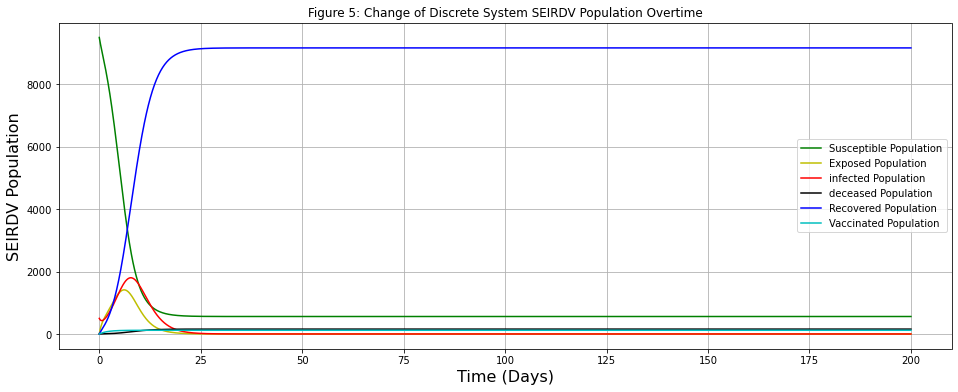

In [14]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
p=0.05
delta=0.05

t=numpy.linspace(0,200,2000)
s_array=numpy.zeros(len(t))
e_array=numpy.zeros(len(t))
i_array=numpy.zeros(len(t))
r_array=numpy.zeros(len(t))
d_array=numpy.zeros(len(t))
v_array=numpy.zeros(len(t))

s_array[0]=9500
e_array[0]=0
i_array[0]=500
r_array[0]=0
d_array[0]=0
v_array[0]=0

#computing change of populations overtime
for i in range(1,len(t)):
    s_array[i]=s_array[i-1]+(-alpha*i_array[i-1]*s_array[i-1])/N-p*(N-v_array[i-1])*b+v_array[i-1]*delta
    e_array[i]=e_array[i-1]+(alpha*i_array[i-1]*s_array[i-1])/N-zeta*e_array[i-1]
    i_array[i]=i_array[i-1]+zeta*e_array[i-1]-(1-eta)*beta*i_array[i-1]-eta*mu*i_array[i-1]
    r_array[i]=r_array[i-1]+(1-eta)*beta*i_array[i-1]
    d_array[i]=d_array[i-1]+eta*mu*i_array[i-1]
    v_array[i]=v_array[i-1]+p*(N-v_array[i-1])*b-v_array[i-1]*delta
    
#plotting the ODE system and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, s_array,'g-',label='Susceptible Population')
axes.plot(t, e_array,'y-',label='Exposed Population')
axes.plot(t, i_array,'r-',label='infected Population')
axes.plot(t, d_array,'k-',label='deceased Population')
axes.plot(t, r_array,'b-',label='Recovered Population')
axes.plot(t, v_array,'c-',label='Vaccinated Population')
axes.set_title("Figure 5: Change of Discrete System SEIRDV Population Overtime")
axes.set_xlabel("Time (Days)", fontsize=16)
axes.set_ylabel("SEIRDV Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

**SIR Model in Discrete SEIRDV Model**\
SIR in SEIRDV was analyzed to show if there is better correlation with the real world data.

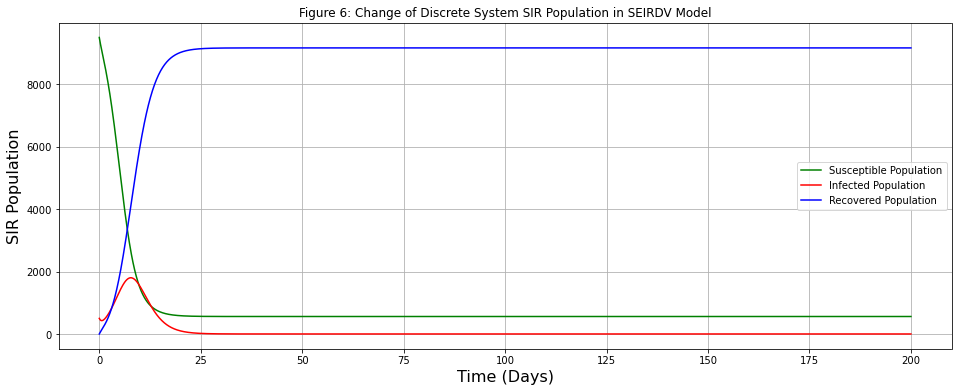

In [15]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
p=0.05
delta=0.05

t=numpy.linspace(0,200,2000)
s_array=numpy.zeros(len(t))
e_array=numpy.zeros(len(t))
i_array=numpy.zeros(len(t))
r_array=numpy.zeros(len(t))
d_array=numpy.zeros(len(t))
v_array=numpy.zeros(len(t))

s_array[0]=9500
e_array[0]=0
i_array[0]=500
r_array[0]=0
d_array[0]=0
v_array[0]=0

#computing change of populations overtime
for i in range(1,len(t)):
    s_array[i]=s_array[i-1]+(-alpha*i_array[i-1]*s_array[i-1])/N-p*(N-v_array[i-1])*b+v_array[i-1]*delta
    e_array[i]=e_array[i-1]+(alpha*i_array[i-1]*s_array[i-1])/N-zeta*e_array[i-1]
    i_array[i]=i_array[i-1]+zeta*e_array[i-1]-(1-eta)*beta*i_array[i-1]-eta*mu*i_array[i-1]
    r_array[i]=r_array[i-1]+(1-eta)*beta*i_array[i-1]
    d_array[i]=d_array[i-1]+eta*mu*i_array[i-1]
    v_array[i]=v_array[i-1]+p*(N-v_array[i-1])*b-v_array[i-1]*delta
    
#plotting the ODE system and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, s_array,'g-',label='Susceptible Population')
axes.plot(t, i_array,'r-',label='Infected Population')
axes.plot(t, r_array,'b-',label='Recovered Population')
axes.set_title("Figure 6: Change of Discrete System SIR Population in SEIRDV Model")
axes.set_xlabel("Time (Days)", fontsize=16)
axes.set_ylabel("SIR Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

## <span style='color:Red'> **Scenario 2: Once Recovered from COVID, the individual is still susceptible to the virus. Vaccination does not exist. (I know vaccine exists now but yes, let's assume this)**  </span> 

### <span style='color:Black'>This scenario will be based on the fact that once the infected individuals recover, they will be susceptible to the virus again. Moreover, a vaccine does not exist. According to CDC, refection is possible. </span>

### <span style='color:Blue'>SIS Model: General Model </span>

**Dynamical SIS Model**\
In this dynamical system, I have a susceptible population towards the virus and an infected population of the virus. My defined system is shown below: 
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N}+\beta I\\
\frac{dI}{dt}&= \frac{\alpha SI}{N} -\beta I\\
\end{aligned}
$$
$\alpha$ is the infection rate per person and $\beta$ is the recovery rate per day, and $N$ is the total population. 

In [16]:
def B1(t,u,N,alpha,beta):
    """ RHS of SIS model
    
    parameters:
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of [s, i] values such that sum(u) = N 
        N: float
            total population
        alpha: float
            infection rate per person
        beta: float
            recovery rate per day
            
    returns:
        Fu: numpy array
    """
    
    #defining variables
    sus=u[0]
    infec=u[1]
    Fu=[]
    
    #appending rate of change values of the SIR ode system
    Fu.append((-alpha*infec*sus)/N+beta*infec)
    Fu.append((alpha*infec*sus)/N-beta*infec)
    
    #returning output
    return Fu

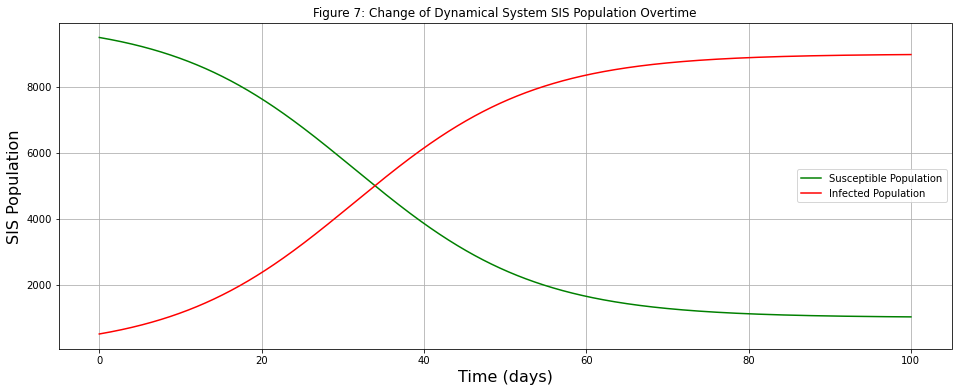

In [17]:
#defining variables
N=10000
alpha = 0.1
beta=0.01
f = lambda t, u: B1(t, u, N, alpha, beta)
t_span = [0., 100.]
u_0 = numpy.array([9500, 500])

#using my routine to solve the ODE system
t, u = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u[0],'g-',label='Susceptible Population')
axes.plot(t, u[1],'r-',label='Infected Population')
axes.set_title("Figure 7: Change of Dynamical System SIS Population Overtime")
axes.set_xlabel("Time (days)", fontsize=16)
axes.set_ylabel("SIS Population", fontsize=16)
axes.grid()
axes.legend(loc='center right')
plt.show()

In [18]:
#testing cell
N=10000
alpha = 0.1
beta=0.01
f = lambda t, u: B1(t, u, N, alpha, beta)
t_span = [0., 100.]
u_0 = numpy.array([9500, 500])
t, u = my_ode_solver(f, t_span, u_0, N)

# testing my routine to the true solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)
numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-5, atol=1.e-5)
print('success!')

success!


**Discrete SIS Model**\
In this discrete system, I have a susceptible population towards the virus and an infected population of the virus. My defined system is shown below: 
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N}+I_n\beta \\
I_{n+1} &= I_n-I_n\beta + \frac{\alpha I_n S_n}{N}\\
\end{aligned}
$$
$\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day and $N$ is the total population. 

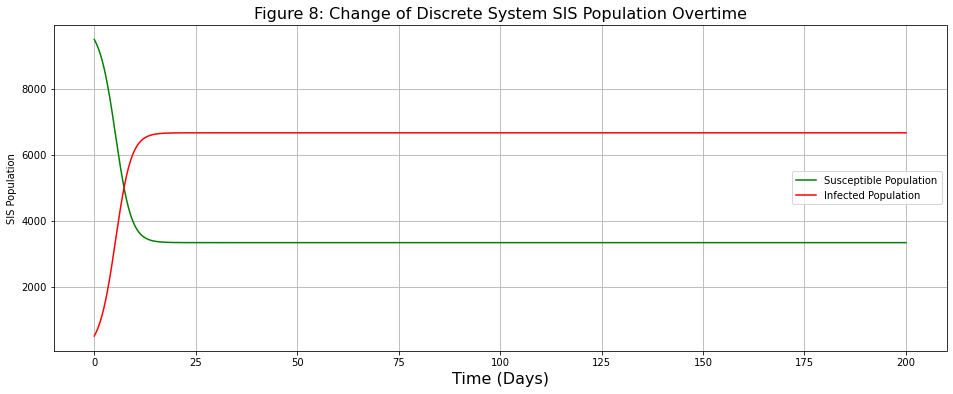

In [19]:
#defining variables
N=10000
alpha=0.15
beta=0.05
sus=9500
infec=500
t=numpy.linspace(0,200,1000)
s_array=numpy.zeros(len(t))
i_array=numpy.zeros(len(t))
s_array[0]=sus
i_array[0]=infec

#computing change of sub-populations overtime
for i in range(1,len(t)):
    s_array[i]=s_array[i-1]-(alpha*s_array[i-1]*i_array[i-1])/N+(i_array[i-1])*beta
    i_array[i]=i_array[i-1]-i_array[i-1]*beta+(alpha*s_array[i-1]*i_array[i-1])/N
    
#plotting the ODE system and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, s_array,'g-',label='Susceptible Population')
axes.plot(t, i_array,'r-',label='Infected Population')
axes.set_ylabel("SIS Population")
axes.set_xlabel("Time (Days)", fontsize=16)
axes.set_title("Figure 8: Change of Discrete System SIS Population Overtime", fontsize=16)
axes.grid()
axes.legend(loc=7)
plt.show()

### <span style='color:Blue'>SEISD Model: Advanced model with more components to mimic real world scenario </span>

**Dynamical system of SEISD Model**: \
In this dynamical system, I have a susceptible population towards the virus, an exposed population to the virus, an infected population from the virus and deceased population from the virus. My defined system is shown below:

$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N} +(1-\eta)\beta I - bI\\
\frac{dE}{dt}&= \frac{\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I + bI\\
\frac{dD}{dt}&= \eta \mu I\\
\end{aligned}
$$
$\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day, $b$ is the birth rate per day, $\eta$ is the fatality rate, $\zeta$ is the incubation period once exposed, $\mu$ is the death rate, and $N$ is the total population. 


In [20]:
def B2(t,u,N,alpha,beta,eta,zeta,b,mu):
    """ RHS of SEISD model 
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, e, i, r, d, v] values such that sum(u) = 1 
            (and s,e,i,r,d,v are fractions of the total population N)
        N: float
            total population
        alpha: float
            infection rate per person
        beta: float
            recovery rate per day
        eta: float
            fatility rate
        zeta: float
            incubation period once exposed 
        b: float
            birth rate
        mu: float
            death rate

                   
    returns:
        Fu: numpy array
    """
    
    #defining variables
    sus=u[0]
    exp=u[1]
    infec=u[2]
    death=u[3]
    Fu=[]
    
    #appending rate of change values of the SIR ode system
    Fu.append((-alpha*infec*sus)/N+(1-eta)*beta*infec-b*infec)
    Fu.append((alpha*infec*sus)/N-zeta*exp)
    Fu.append(zeta*exp-(1-eta)*beta*infec-eta*mu*infec+b*infec)
    Fu.append(eta*mu*infec) 
    
    #returning output
    return Fu

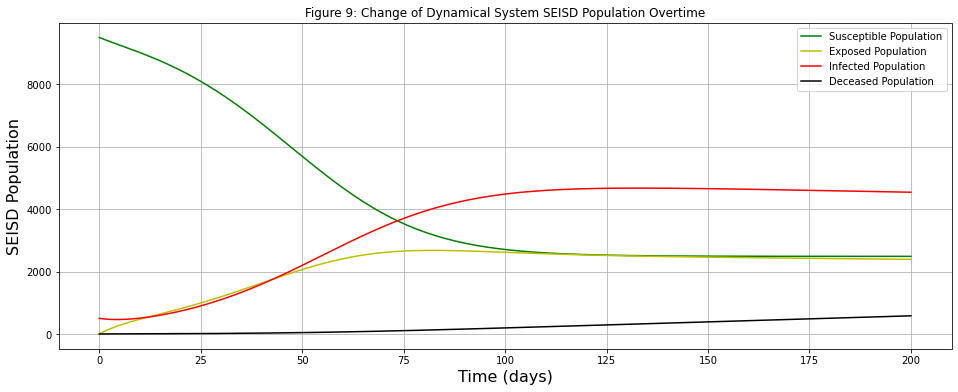

In [21]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
f = lambda t, u: B2(t,u,N,alpha,beta,eta,zeta,b,mu)
t_span = [0., 200.]
u_0 = numpy.array([9500, 0, 500,0])

#using my routine to solve the ODE system
t, u = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u[0],'g-',label='Susceptible Population')
axes.plot(t, u[1],'y-',label='Exposed Population')
axes.plot(t, u[2],'r-',label='Infected Population')
axes.plot(t, u[3],'k-',label='Deceased Population')
axes.set_title("Figure 9: Change of Dynamical System SEISD Population Overtime")
axes.set_xlabel("Time (days)", fontsize=16)
axes.set_ylabel("SEISD Population", fontsize=16)
axes.grid()
axes.legend(loc='upper right')
plt.show()

In [22]:
#testing cell

#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
f = lambda t, u: B2(t,u,N,alpha,beta,eta,zeta,b,mu)
t_span = [0., 200.]
u_0 = numpy.array([9500, 0, 500,0])
t, u = my_ode_solver(f, t_span, u_0, N)

# testing my routine to the true solution
sol = solve_ivp(f, t_span, u_0, method='RK45', dense_output=True, rtol=1.e-6, atol = 1.e-8)
numpy.testing.assert_allclose(u, sol.sol(t), rtol=1.e-5, atol=1.e-5)
print('success!')

success!


**SIS Model in Dynamical SEISD Model**\
SIS in SEISD was analyzed to show if there is better correlation with the real world data.

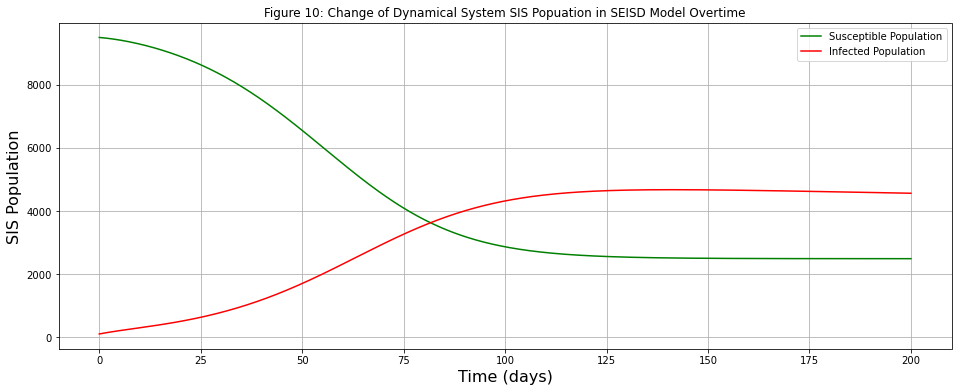

In [23]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
B2(t,u,N,alpha,beta,eta,zeta,b,mu)
t_span = [0., 200.]
u_0 = numpy.array([9500, 400, 100,0])

#using my routine to solve the ODE system
t, u = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, u[0],'g-',label='Susceptible Population')
axes.plot(t, u[2],'r-',label='Infected Population')
axes.set_title("Figure 10: Change of Dynamical System SIS Popuation in SEISD Model Overtime")
axes.set_xlabel("Time (days)", fontsize=16)
axes.set_ylabel("SIS Population", fontsize=16)
axes.grid()
axes.legend(loc='upper right')
plt.show()

**Discrete system SEISD Model**: \
In this discrete system, I have a susceptible population towards the virus, an exposed population to the virus, an infected population from the virus, a recovered population from the virus and a deceased population from the virus. My defined system is shown below:
$$
\begin{aligned}
S_{n+1} &= S_n-\frac{\alpha I_n S_n}{N} +(1-\eta)\beta I_n - bI_n\\
E_{n+1} &= E_n+\frac{\alpha I_n S_n}{N}-E_n\zeta\\
I_{n+1} &= I_n+E_n\zeta-(1-\eta)\beta I_n-\eta \mu I_n + bI_n\\\
D_{n+1} &= D_n+\eta \mu I_n\\
\end{aligned}
$$
$\alpha$ is the infection rate per person, $\beta$ is the recovery rate per day, $b$ is the birth rate per day, $\eta$ is the fatality rate, $\zeta$ is the incubation period once exposed, $\mu$ is the death rate, and $N$ is the total population. 


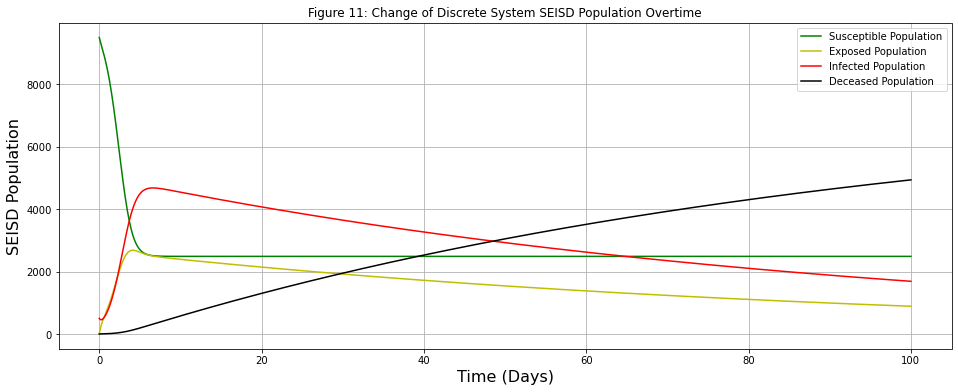

In [24]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06

t=numpy.linspace(0,100,2000)
s_array=numpy.zeros(len(t))
e_array=numpy.zeros(len(t))
i_array=numpy.zeros(len(t))
d_array=numpy.zeros(len(t))

s_array[0]=9500
e_array[0]=0
i_array[0]=500
d_array[0]=0


#computing change of populations overtime
for i in range(1,len(t)):
    s_array[i]=(s_array[i-1]-(alpha*i_array[i-1]*s_array[i-1])/N+(1-eta)*beta*i_array[i-1]-b*i_array[i-1])
    e_array[i]=(e_array[i-1]+(alpha*i_array[i-1]*s_array[i-1])/N-zeta*e_array[i-1])
    i_array[i]=(i_array[i-1]+zeta*e_array[i-1]-(1-eta)*beta*i_array[i-1]-eta*mu*i_array[i-1]+b*i_array[i-1])
    d_array[i]=(d_array[i-1]+eta*mu*i_array[i-1])
    
#plotting the ODE system and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, s_array,'g-',label='Susceptible Population')
axes.plot(t, e_array,'y-',label='Exposed Population')
axes.plot(t, i_array,'r-',label='Infected Population')
axes.plot(t, d_array,'k-',label='Deceased Population')
axes.set_title("Figure 11: Change of Discrete System SEISD Population Overtime")
axes.set_xlabel("Time (Days)", fontsize=16)
axes.set_ylabel("SEISD Population", fontsize=16)
axes.grid()
axes.legend(loc='upper right')
plt.show()

**SIS Model in Discrete SEISD Model**\
SIS in SEISD was analyzed to show if there is better correlation with the real world data.

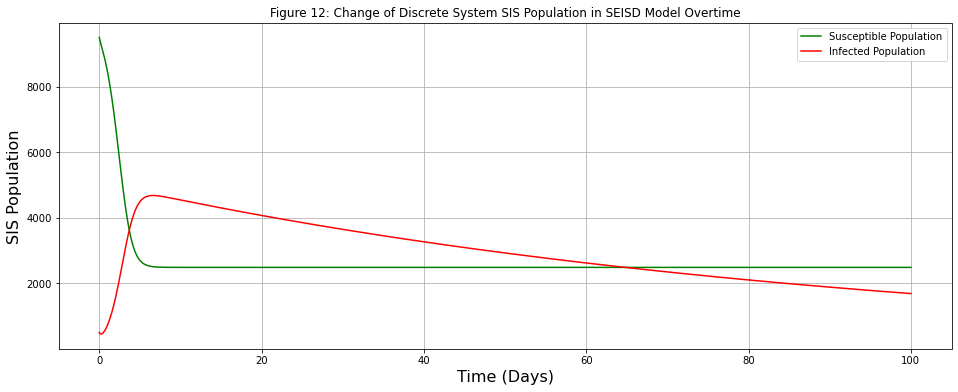

In [25]:
#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06

t=numpy.linspace(0,100,2000)
s_array=numpy.zeros(len(t))
e_array=numpy.zeros(len(t))
i_array=numpy.zeros(len(t))
d_array=numpy.zeros(len(t))

s_array[0]=9500
e_array[0]=0
i_array[0]=500
d_array[0]=0


#computing change of populations overtime
for i in range(1,len(t)):
    s_array[i]=(s_array[i-1]-(alpha*i_array[i-1]*s_array[i-1])/N+(1-eta)*beta*i_array[i-1]-b*i_array[i-1])
    e_array[i]=(e_array[i-1]+(alpha*i_array[i-1]*s_array[i-1])/N-zeta*e_array[i-1])
    i_array[i]=(i_array[i-1]+zeta*e_array[i-1]-(1-eta)*beta*i_array[i-1]-eta*mu*i_array[i-1]+b*i_array[i-1])
    d_array[i]=(d_array[i-1]+eta*mu*i_array[i-1])
    
#plotting the ODE system and labelling it
fig = plt.figure(figsize=(16,6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(t, s_array,'g-',label='Susceptible Population')
axes.plot(t, i_array,'r-',label='Infected Population')
axes.set_title("Figure 12: Change of Discrete System SIS Population in SEISD Model Overtime")
axes.set_xlabel("Time (Days)", fontsize=16)
axes.set_ylabel("SIS Population", fontsize=16)
axes.grid()
axes.legend(loc='upper right')
plt.show()

### <span style='color:Black'>As it can be observed from the results above, a dynamical system describes a more practical scenario than the discrete system. Thus, analysis of $R_0$ was conducted using a dynamic system (Will explain in discussion). </span>

## <span style='color:Red'> Basic Reproduction Number </span>
Each $R_0$ expression for the two different models are defined below:\
$R_0$ for the general models: $R_0=\frac{\alpha}{\beta}$\
$R_0$ for the advanced models: $R_0=\frac{\zeta}{\zeta+\mu}\frac{\alpha}{\zeta+\beta+b}$

From multiple resources, the average of $\beta$ for this pandemic was depicted as $0.05$. However $R_0$ had a range of values that was covered in different articles: $1.5 - 5$. Thus, a bifurcation diagram was constructed to analyze the maximum infection of people in the models for different indicated $R_0$. $R_0$ was used to calculate $\alpha$.

Similar to computations performed above, the following values for each parameters were used:\
$b=0.0136$, $\zeta=\frac{1}{14}$, $\eta=0.014$, $\mu=0.06$, $p=0.05$ and $\delta=0.05$

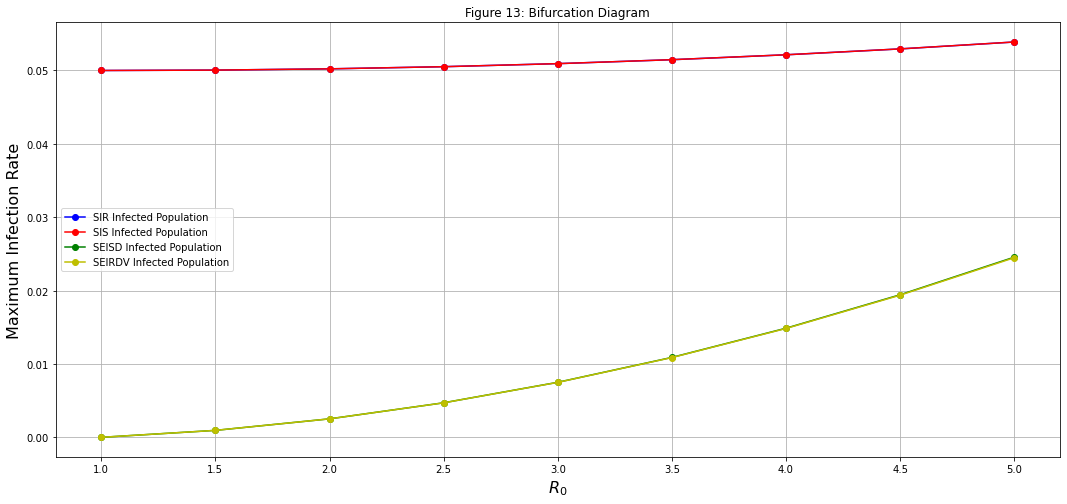

In [26]:
#defining variables
R_0=numpy.array([1,1.5,2,2.5,3,3.5,4,4.5,5])
beta=0.05
zeta=1/14
b=0.0136
eta=0.014
mu=0.06
p=0.05
delta=0.05
N=10000
alpha_general=numpy.array(R_0*beta)
alpha_advanced=numpy.array((((zeta+mu)/zeta)*R_0*(zeta+mu+b)))
t_span = [0., 100.]
tt=numpy.linspace(0,100,2000)

i_t1=[]
i_t2=[]
i_t3=[]
i_t4=[]
tt=numpy.linspace(0,100,2000)

for i in range(len(R_0)):
    
    #defining an event for SIR
    def myevent1(t,u):
        return ((alpha_general[i]*u[1]*u[0])/N-beta*u[1])
    myevent1.terminal=False
    myevent1.direction=0

    #defining an event for SIS
    def myevent2(t,u):
        return ((alpha_general[i]*u[1]*u[0])/N-beta*u[1])
    myevent2.terminal=False
    myevent2.direction=0
             
    #defining an event for SEISD
    def myevent3(t,u):
        return (zeta*u[1]-(1-eta)*beta*u[2]-eta*mu*u[2]+b*u[2])
    myevent3.terminal=False
    myevent3.direction=0
             
    #defining an event for SEIRDV
    def myevent4(t,u):
        return (zeta*u[1]-(1-eta)*beta*u[2]-eta*mu*u[2])
    myevent4.terminal=False
    myevent4.direction=0
    
    #defining variables
    f1 = lambda t, u: A1(t, u, N, alpha_general[i], beta)
    f4 = lambda t, u: A2(t,u,N,alpha_advanced[i],beta,eta,zeta,b,mu,p,delta)
    f2 = lambda t, u: B1(t, u, N, alpha_general[i], beta)
    f3 = lambda t, u: B2(t,u,N,alpha_advanced[i],beta,eta,zeta,b,mu)
    
    t_span = [0., 200.]
    u_sir = numpy.array([9500, 500, 0])
    u_sis=numpy.array([9500,500])
    u_seisd = numpy.array([9500, 0, 500,0])
    u_seirdv=numpy.array([9500,0,500,0,0,0])
    
    #solving the ODE system and appending the results
    sol1=solve_ivp(f1,t_span,u_sir,events=myevent1, dense_output=True)
    sol2=solve_ivp(f2,t_span,u_sis,events=myevent2, dense_output=True)
    sol3=solve_ivp(f3,t_span,u_seisd,events=myevent3, dense_output=True)
    sol4=solve_ivp(f4,t_span,u_seirdv,events=myevent4, dense_output=True)
    z1=sol1.sol(tt)
    z2=sol2.sol(tt)
    z3=sol3.sol(tt)
    z4=sol4.sol(tt)
    i_t1.append(z1.T[i][1])
    i_t2.append(z2.T[i][1])
    i_t3.append(z3.T[i][1])
    i_t4.append(z4.T[i][1])

#plotting the ODE system and labelling it
fig = plt.figure(figsize=(18,8))
axes = fig.add_subplot(1, 1, 1)
axes.plot(R_0, numpy.array(i_t1)/N,'bo-',label='SIR Infected Population')
axes.plot(R_0, numpy.array(i_t2)/N,'ro-',label='SIS Infected Population')
axes.plot(R_0, numpy.array(i_t3)/N,'go-',label='SEISD Infected Population')
axes.plot(R_0, numpy.array(i_t4)/N,'yo-',label='SEIRDV Infected Population')
axes.set_title("Figure 13: Bifurcation Diagram")
axes.set_xlabel("$R_0$", fontsize=16)
axes.set_ylabel("Maximum Infection Rate", fontsize=16)
axes.grid()
axes.legend(loc='center left')
plt.show()


## <span style='color:Red'>Social Distancing Concept</span>

In this section, I will introduce a contact rate reducing factor $k$ to mimic social distancing and demonstrate the effects it has on the dynamical systems: SEIRDV and SEISD. As explained above, $k$ needs to be applied to the differential equations for the susceptible and exposed population as these sub-populations are where the interaction between the infected and susceptible take place.

### <span style='color:Blue'>SEIRDV Model</span>

**Recall from Figure 3 (Dynamical SEIRDV Model)**\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N}-p(N-V)b + V\delta \\
\frac{dE}{dt}&= \frac{\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I\\
\frac{dR}{dt}&= (1-\eta)\beta I\\
\frac{dD}{dt}&= \eta \mu I\\
\frac{dV}{dt}&= p(N-V)b - V\delta\\
\end{aligned}
$$

**By introducing parameter $k$ the dynamical system with social distancing can refine the above system as:**\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{k\alpha I S}{N}-p(N-V)b + V\delta \\
\frac{dE}{dt}&= \frac{k\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I\\
\frac{dR}{dt}&= (1-\eta)\beta I\\
\frac{dD}{dt}&= \eta \mu I\\
\frac{dV}{dt}&= p(N-V)b - V\delta\\
\end{aligned}
$$
For easier observation purposes, the following populations will only be graphed: S(t), I(t), R(t) and D(t). 

In [27]:
def C1(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta,k):
    """ RHS of refined SEIRDV model 
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of [ S, E, I, R, D, V] values such that sum(u) = N
        N: float
            total population
        alpha: float
            infection rate per person
        beta: float
            recovery rate per day
        eta: float
            fatility rate
        zeta: float
            incubation period once exposed 
        b: float
            birth rate
        mu: float
            death rate
        p: float
            vaccination rate at birth
        delta: float
            non-birth vaccination rate
        k: float
            contact rate reduction factor
                   
    returns:
        Fu: numpy array
    """
    
    #defining variables
    sus=u[0]
    exp=u[1]
    infec=u[2]
    rec=u[3]
    death=u[4]
    vac=u[5]
    Fu=[]
    
    #appending rate of change values of the ode system
    Fu.append(k*(-alpha*infec*sus)/N-p*(N-vac)*b+vac*delta)
    Fu.append(k*(alpha*infec*sus)/N-zeta*exp)
    Fu.append(zeta*exp-(1-eta)*beta*infec-eta*mu*infec)
    Fu.append((1-eta)*beta*infec)
    Fu.append(eta*mu*infec) 
    Fu.append(p*(N-vac)*b-vac*delta)
    
    #returning output
    return Fu

In [28]:
%matplotlib notebook

# Prevents the pop-up graphs in a separate window.
get_ipython().run_line_magic('matplotlib', 'inline')

#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06
p=0.05
delta=0.05

def sir_interactive_func1(k):
#defining variables
    g = lambda t, u: C1(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta,k)
    f = lambda t, u: A2(t,u,N,alpha,beta,eta,zeta,b,mu,p,delta)
    t_span = [0., 200.]
    u_0 = numpy.array([9500, 0, 500,0,0,0])

#using my routine to solve the ODE system
    t, u = my_ode_solver(g, t_span, u_0, N)
    t1, u1 = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
    fig = plt.figure(figsize=(20,8))
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(t, u[0],'g--',label='Susceptible Population with Social Distancing')
    axes.plot(t, u[2],'r--',label='Infected Population with Social Distancing')
    axes.plot(t, u[3],'b--',label='Recovered Population with Social Distancing')
    axes.plot(t, u[4],'k--',label='Deceased Population with Social Distancing')
    axes.plot(t1, u1[0],'g-',label='Susceptible Population')
    axes.plot(t1, u1[2],'r-',label='Infected Population')
    axes.plot(t1, u1[3],'b-',label='Recovered Population')
    axes.plot(t1, u1[4],'k-',label='Deceased Population')
    axes.set_title("Figure 14: Effects of Social Distancing on Dynamical System SEIRDV Population", fontsize=16)
    axes.set_xlabel("Time (days)", fontsize=16)
    axes.set_ylabel("SEIRDV Population", fontsize=16)
    axes.grid()
    axes.legend(bbox_to_anchor=(1, 1))
    plt.show()

#producing an interactive plot
interactive_plot = interactive(sir_interactive_func1, k=(0,1,0.01))
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='k', max=1.0, step=0.01), Output()), _dom_classes=('w…

### <span style='color:Blue'>SEISD Model</span>

**Recall from Figure 9 (Dynamical SEISD Model)**\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{\alpha I S}{N} +(1-\eta)\beta I - bI\\
\frac{dE}{dt}&= \frac{\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I + bI\\\
\frac{dD}{dt}&= \eta \mu I\\
\end{aligned}
$$

**By introducing parameter $k$ the dynamical system with social distancing can refine the system above as:**\
$$
\begin{aligned}
\frac{dS}{dt} &= -\frac{k\alpha I S}{N} +(1-\eta)\beta I - bI\\
\frac{dE}{dt}&= \frac{k\alpha IS}{N}-E\zeta\\
\frac{dI}{dt}&= E\zeta-(1-\eta)\beta I-\eta \mu I + bI\\\
\frac{dD}{dt}&= \eta \mu I\\
\end{aligned}
$$

In [29]:
def C2(t,u,N,alpha,beta,eta,zeta,b,mu,k):
    """ RHS of refined SEISD model 
    
    parameters
    ----------
        t: float
            time (just a dummy variable here because this is an autonomous system)
        u: numpy array
            array of scaled [ s, e, i, r, d, v] values such that sum(u) = 1 
            (and s,e,i,r,d,v are fractions of the total population N)
        N: float
            total population
        alpha: float
            infection rate per person
        beta: float
            recovery rate per day
        eta: float
            fatility rate
        zeta: float
            incubation period once exposed 
        b: float
            birth rate
        mu: float
            death reate
        k: float
            contact rate reducing factor
                   
    returns:
        Fu: numpy array
    """
    
    #defining variables
    sus=u[0]
    exp=u[1]
    infec=u[2]
    death=u[3]
    Fu=[]
    
    #appending rate of change values of the SIR ode system
    Fu.append(k*(-alpha*infec*sus)/N+(1-eta)*beta*infec-b*infec)
    Fu.append(k*(alpha*infec*sus)/N-zeta*exp)
    Fu.append(zeta*exp-(1-eta)*beta*infec-eta*mu*infec+b*infec)
    Fu.append(eta*mu*infec) 
    
    #returning output
    return Fu

In [30]:
%matplotlib notebook

# Prevents the pop-up graphs in a separate window.
get_ipython().run_line_magic('matplotlib', 'inline')

#defining variables
N=10000
beta=0.05
alpha=0.15
eta=0.014
zeta=1/14
b=0.012
mu=0.06


def sir_interactive_func2(k):
#defining variables
    g = lambda t, u: C2(t,u,N,alpha,beta,eta,zeta,b,mu,k)
    f = lambda t, u: B2(t,u,N,alpha,beta,eta,zeta,b,mu)
    t_span = [0., 200.]
    u_0 = numpy.array([9500, 0, 500,0])

#using my routine to solve the ODE system
    t, u = my_ode_solver(g, t_span, u_0, N)
    t1, u1 = my_ode_solver(f, t_span, u_0, N)

#plotting the figure and labelling it
    fig = plt.figure(figsize=(16,6))
    axes = fig.add_subplot(1, 1, 1)
    axes.plot(t, u[0],'g--',label='Susceptible Population with Social Distancing')
    axes.plot(t, u[1],'y--',label='Exposed Population with Social Distancing')
    axes.plot(t, u[2],'r--',label='Infected Population with Social Distancing')
    axes.plot(t, u[3],'k--',label='Deceased Population with Social Distancing')
    axes.plot(t1, u1[0],'g-',label='Susceptible Population')
    axes.plot(t1, u1[1],'y-',label='Exposed Population')
    axes.plot(t1, u1[2],'r-',label='Infected Population')
    axes.plot(t1, u1[3],'k-',label='Deceased Population')
    axes.set_title("Figure 15: Effects of Social Distancing on Dynamic System SEISD Population", fontsize=16)
    axes.set_xlabel("Time (days)", fontsize=16)
    axes.set_ylabel("SEISD Population", fontsize=16)
    axes.grid()
    axes.legend(bbox_to_anchor=(1, 1))
    plt.show()

#producing an interactive plot
interactive_plot = interactive(sir_interactive_func2, k=(0,1,0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='k', max=1.0, step=0.01), Output()), _dom_classes=('w…

## Discussion [10 pts]

Discuss the results of your code including
* Why do you believe that your numerical results are correct (convergence, test cases etc)?
* Did the project work (in your opinion)?
* If yes:  what would be the next steps to try
* If no:  Explain why your approach did not work and what you would do differently next time


In this project, a dynamical and discrete system was analyzed. Two scenarios of epidemiological models were analyzed in both systems to determine which system can model COVID-19 the best. The first scenario was based on the SIR model where the notion of recovery from COVID-19 was taken into account. This system was later improved to a SEIRDV model to mimic a more real life scenario by documenting more sub-populations. Later, a SIR model was used from the SEIRDV model and compared to the real-life trend and previous simulation of SIR that was made. Furthermore, the second scenario, a SIS model, was modelled to document a situation where there is no vaccination and reinfection. Similarly, this model was later improved to a SEISD model to document a more real life situation and a SIS model was retreived and compared to the original SIS model that was previously constructed. These models were then later compared to the real-life trend and simulation that was made. In addition, a bifurcation diagram was constructed to illustrate how the infection rate changes with different basic reproduction numbers. Finally, social distancing was incorporated into the SEIRDV and SIESD model to see how it affects the epidemiological model overtime.

From Figure 1 to 12, the comparison of models from the dynamical system and discrete system were presented. In all cases, the total population were constant, which is a good sign. This can be proved by summing all the sub-populations which equal to the total population $N$ at any timepoint. In comparing Figure 1&2 and Figure 7&8, it can be observed that the discrete system has sudden changes close to the beginning (ex. around 10 days for I(t) to peak) while the dynamical system had slower fluctuations throughout. In comparing Figure 3 and 5, the discrete system had a sudden rise in infections around 10 days and reaches 0 infections approximately 14 days later while the dynamical system demonstrates a strong correlation between each sub-population overtime (exposed to infected, infected to recovered or deceased) really well. The Infection peak in this case was around 80 days. The deceased population and vaccinated population do show agreement betweem these two figures. Figure 4&6 are the focused version of the susceptible, infected and recovered population from the SEIRDV model. When comparing these models to Figure 1&2, the big picture does represent the same idea but smaller fluctuations in all subpopulations were observed in the focused model. As parameters such as incubation period, birth rates and death rates are not illustrated in Figure 1&2, there was some misalignment presented in how long it takes for the virus to affect the susceptible population making them less practical. Additionally when comparing Figure 9&11, it can be seen that the discrete system has a greater fluctuation in sub-populations overtime. Especially for the deceased population, there is a massive increase in deaths overtime which does not seem logical compared to the infected population. The dynamical system on the other hand, does show consistency in practical sense between the sub-populations without any exaggerated trends (ex. deceased population is practical, relationship of exposed and infected are well documented). Thus, a more logical figure was obtained in this case. In addition, Figure 10 was found to be very similar to Figure 7 but the magnitude of the population once it reaches equlibrium was different. On the other hand Figure 7 and 12 were found to be very different between them. The infected population in Figure 12 seemed to decrease once a certain day arrived whereas the infected population for Figure 8 behaved as a normal SIS model just like for the dynamical system case. 

All in all, a dynamical system expresses a more practical real life scenario as no sudden changes in the graphs were observed indicating a more practical scenario. Moreover, huge irregularities between the focused version (SIR and SIS) and the general version were not observed either. There were also stronger correlations between each sub-population. Conversely, overall the discrete system looks like an accelerated version of the dynamical system as the infected population peaked early. There were also disagreements between the focused version and the general version (Figure 8 and 12). From my findings, a more parameterized system gives off better information of the situation and provides a more practical scenario. This is because more correlation is observed between each parameter where a small perturbation can affect the system greater (explained more in the $R_0$ section). In addtion, it will be easier to see how policies and the environment can impact the population overtime with more components. When comparing the models to the simulations ran by other researchers, the pattern of most of my figures (more sub-populations in my dynamical systems) do match which tells us that the simulation I constructed is reasonable. Moreover, I believe my system is more correct as for the deceased population of the researcher's model, stabilization should not occur as it indicates no more new deaths. However, once comparing the models depicting the real-life situation, there is discrepency. All real-life models have their sub-populations rise whereas my models reach equilibrium once a certain time period has passed for most sub-popuations. My sub-populations become close to 0 over a certain period of time. All my graphs are non-oscillatory and do not repeat itself. 

From Figure 13, it can be seen that $R_0$ holds a strong correlation to to the $\alpha$. A greater $R_0$ results into a greater $\alpha$. From this diagram, it can be interpreted that both the SIR and SIS models have a smaller change in the maximum value of $\alpha$ indicating a more stable $\alpha$ compared to the SEIRDV and SEISD models. It is most likely to converge to a certain $\alpha$ value. Conversely, the SEIRDV and SEISD model have a faster rising rate showing the huge changes a parameter can affect the system. Moreover, it can also be interpreted from this result that the more sub-populations that are used, the more easier it may affect the system. In other words, a single perturbation can give arise to a sudden change in the dynamical system, which is more practical in real life. For instance, if the reproduction number rises from 2 to 3 in a N=10000 population, the spread of speed of the virus will immensely change and will affect the community faster. However for the SIR and SIS model, as not much information and factors are incorporated into these illustrations, a small perturbation (value change) will not invoke a huge difference. This may be due to with less parameters, the correlation between other parameters is too small resulting into a more stable system with smaller changes which is impractical. In other words, epidemiological models with less sub-populations and parameters have already a complete shape once made and is resilient to subtle changes. Thus, I believe a larger compartmental system can provide a more practical scenario. 

As it can be observed from Figure 14 and 15, social distancing does have a huge effect on the infected and deceased population. By minimizing the contact between the infected with the susceptible population, the transmission of the virus can be mitigated. It can be seen from both figures that the susceptible population decreases at a smaller rate, and both the infected and deceased population increases at a smaller rate than the case when not incorporating social distancing. This result demonstrates the importance of social distancing, especially with this virus. The miminimum the contact with others, the better. Additionally, compared to the SIR and SIS system, the social distance implementation cannot really be implemented showing the gaps in a smaller system to demonstrate a real-life scenario. 

In conclusion, my methods were deemed to be correct as all test cases were passed and the results for the dynamical system were practical for all cases. Especially for the SEIRDV and SEISD model, a proper and practical interpretation can be made. However, although my construction of a discrete system was correct, the figure does not greatly represent a practical scenario. When comparing to the real life scenario, there is disagreement in between them. Although parameters were adjusted to model the real life situation, the model I made does not necessarily match the real-life data. The real-life scenario shows that infected cases, death cases and recovery cases increase overtime at a rapid rate. However my models do not depict that. This can be due to many factors I did not add to my models such as the geography, lockdown periods, not being an open system and population density. All these factors can greatly impact an epideomiological model and as I made a model with a closed system that lacked these factors, there was a great difference. Thus, next time I would incorporate factors such as different lockdown periods, making my models a more open system, regulating the restrictions that were imposed and attain further precise parameter values. However, throughout the modelling, it was depicted that the basic reproduction number does affect the rate of infection overtime as it can be seen from the bifurcation diagram which my models describe really well. Additionally, social distancing does have an huge effect in mitigating the spread of the virus and minimizing the impact it has in the population. Therefore, social distancing should be enforced and be kept in action at all time to minimize the transmission of the virus and proper protocols must be taken when interacting with others. 